In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [104]:
df = pd.read_csv("house.csv")

df["Area"] = pd.to_numeric(df["Area"], errors='coerce')

df = df.dropna()

df["Address"] = df["Address"].map(df["Address"].value_counts())
df = df.dropna(subset=["Address"])

df = df[df["Area"] < 400]
df = df[df["Address"] > 10]

numeric_columns = ["Area", 'Room', 'Parking', 'Warehouse', 'Elevator', "Address", 'Price']

cdf = df[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address", "Price"]]
cdf["Parking"] = cdf["Parking"].astype(int)
cdf["Warehouse"] = cdf["Warehouse"].astype(int)
cdf["Elevator"] = cdf["Elevator"].astype(int)

scaler = MinMaxScaler()
cdf[numeric_columns] = scaler.fit_transform(cdf[numeric_columns])

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

x_train = np.asanyarray(train[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]])
x_test = np.asanyarray(test[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]])

y_train = np.asanyarray(train[["Price"]])
y_test = np.asanyarray(test[["Price"]])

train

C:\Users\pc\AppData\Local\Temp\ipykernel_19232\252572385.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["Parking"] = cdf["Parking"].astype(int)
C:\Users\pc\AppData\Local\Temp\ipykernel_19232\252572385.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["Warehouse"] = cdf["Warehouse"].astype(int)
C:\Users\pc\AppData\Local\Temp\ipykernel_19232\252572385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,0.094286,0.2,1.0,1.0,1.0,0.793333,0.022253
1,0.085714,0.2,1.0,1.0,1.0,0.793333,0.022253
2,0.140000,0.4,1.0,1.0,1.0,0.900000,0.006091
3,0.185714,0.4,1.0,1.0,1.0,0.386667,0.010474
4,0.265714,0.4,1.0,1.0,1.0,0.320000,0.086275
...,...,...,...,...,...,...,...
3474,0.160000,0.4,1.0,1.0,1.0,0.546667,0.042765
3475,0.151429,0.4,1.0,1.0,1.0,0.380000,0.083789
3476,0.128571,0.4,0.0,0.0,0.0,0.773333,0.003792
3477,0.214286,0.4,1.0,1.0,1.0,0.013333,0.068871


In [105]:
test_area = np.array([])
test_price = np.array([])

for i in range(len(x_test)):
    test_area = np.append(test_area, x_test[i][0])
    test_price = np.append(test_price, y_test[i][0])

min_area = df["Area"].min()
max_area = df["Area"].max()

min_price = df["Price"].min()
max_price = df["Price"].max()

unnormalized_area = test_area * (max_area - min_area) + min_area
unnormalized_price = test_price * (max_price - min_price) + min_price


In [106]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([[ 0.62554359, -0.15207827,  0.0011356 ,  0.00715951,  0.00123633,
        -0.00575799]])

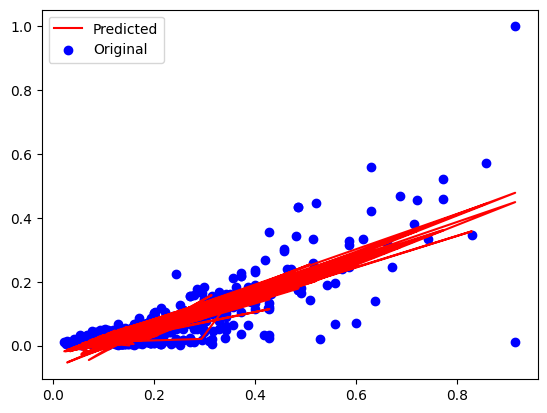

In [107]:
predicted = model.predict(x_test)
coef = model.coef_
intercept = model.intercept_

x_test_df = pd.DataFrame(x_test, columns=numeric_columns[:6])

plt.plot(x_test_df.Area, predicted, color="red", label="Predicted")
plt.scatter(x_test_df.Area, y_test, color="blue", label="Original")
plt.legend()
plt.show()


In [108]:
from sklearn.metrics import r2_score

print(f"R2: {r2_score(y_test, predicted)}")

R2: 0.6521805220672316
